# Importing dataset
*italicized text*

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2, RFE
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve
)


# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()

# Convert to pandas DataFrame for easier exploration
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable (labels)
df['target'] = data.target

# Show the first few rows of the dataset
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0=malignant, 1=benign

In [ ]:
print(X.shape)
print(y.value_counts())

(569, 30)
1    357
0    212
Name: count, dtype: int64


# target distribution

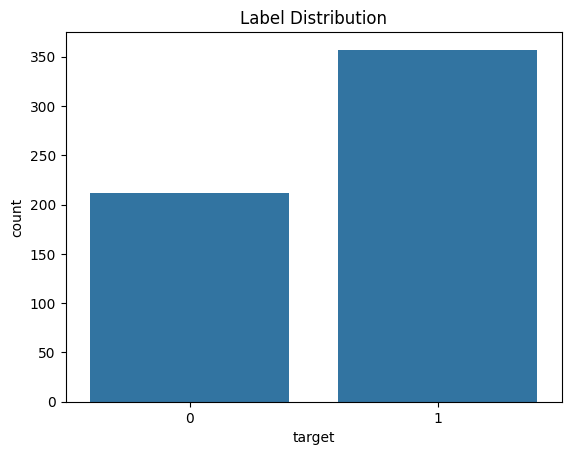

In [ ]:
sns.countplot(x='target', data=df)
plt.title('Label Distribution')
plt.show()

# Confusion matrix

<Axes: >

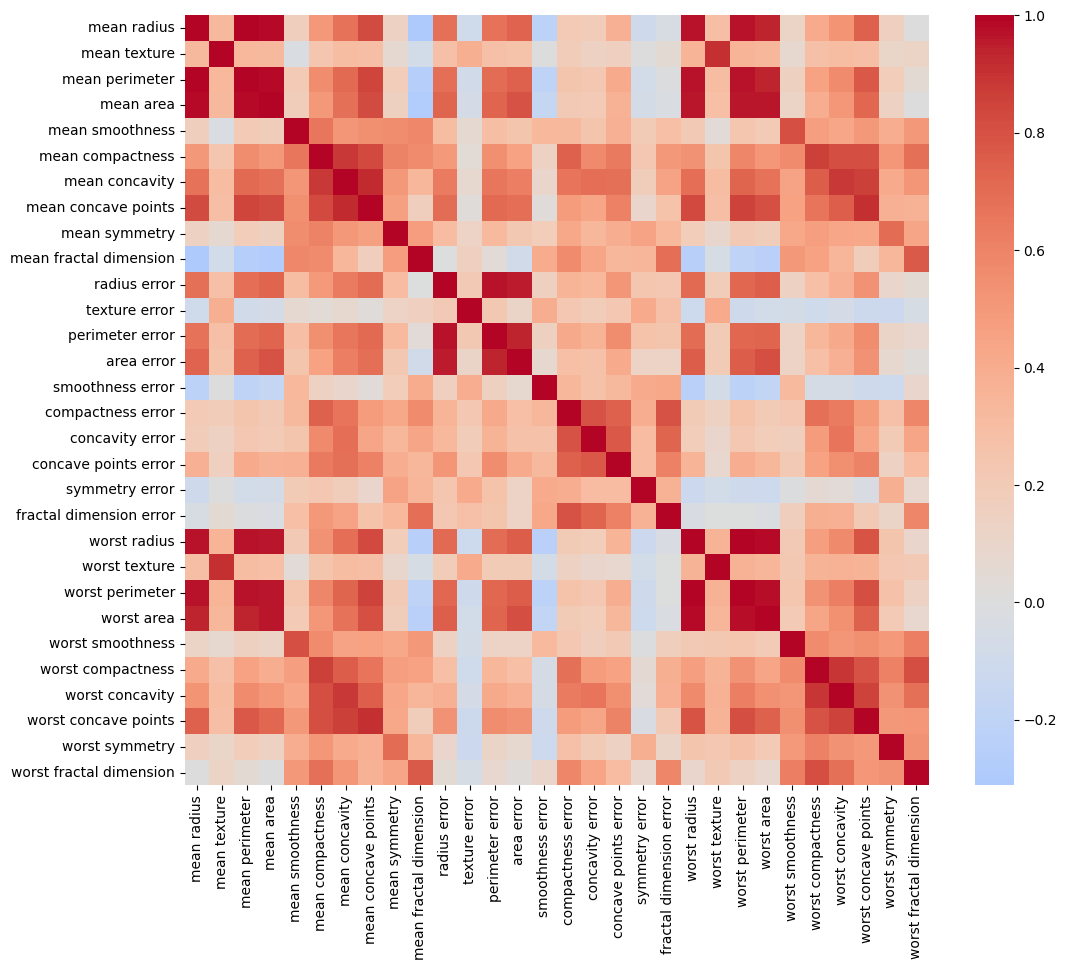

In [ ]:
corr = X.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)

# Train Test Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Standard Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree

Decision Tree Accuracy: 0.8947368421052632
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        42
           1       0.95      0.88      0.91        72

    accuracy                           0.89       114
   macro avg       0.88      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



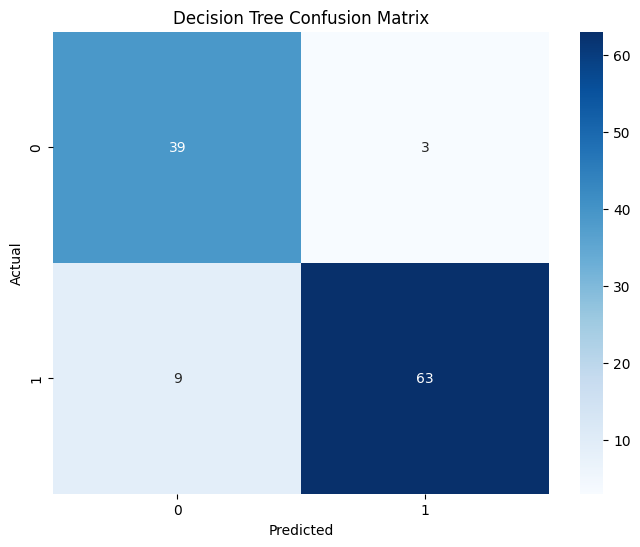

In [ ]:
dt_model = DecisionTreeClassifier(criterion="gini",splitter = "best", max_depth = 4, min_samples_split = 100, random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Naive Bayes

Naive Bayes Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



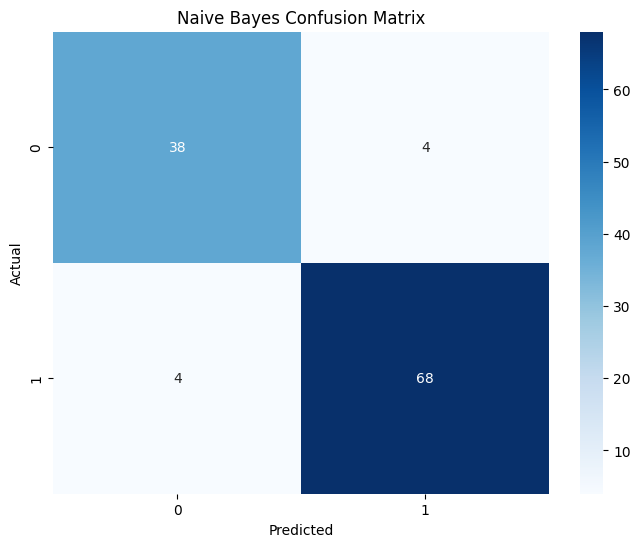

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM

SVM Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



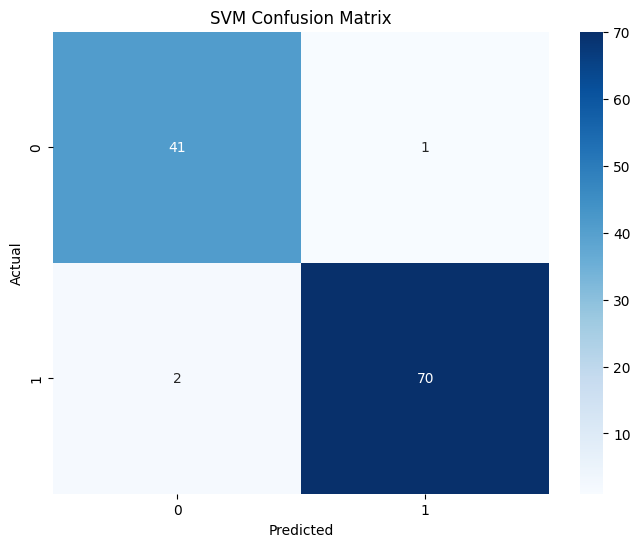

In [ ]:
svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# LDA

LDA Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



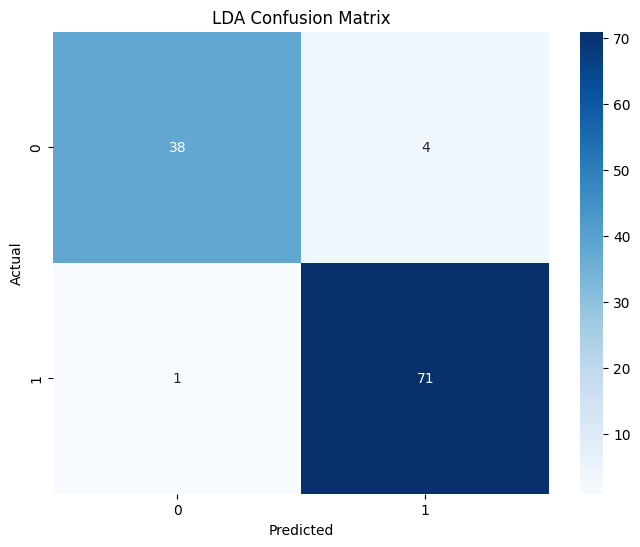

In [ ]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)
y_pred_lda = lda_model.predict(X_test_scaled)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))
cm = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LDA Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest

Random Forest Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



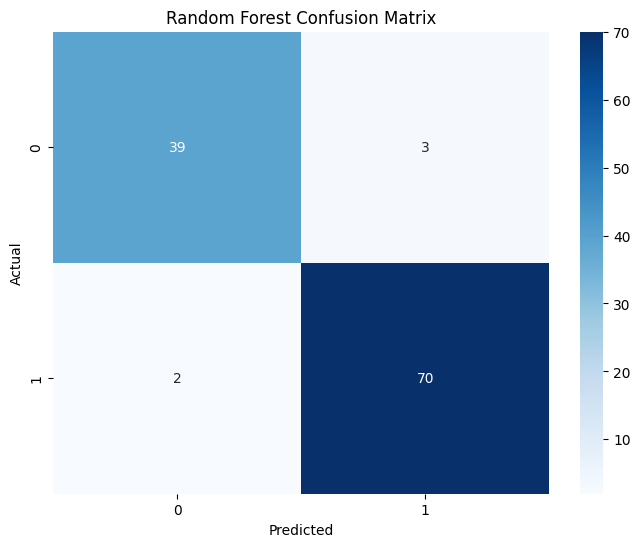

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression

Logistic Regression Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



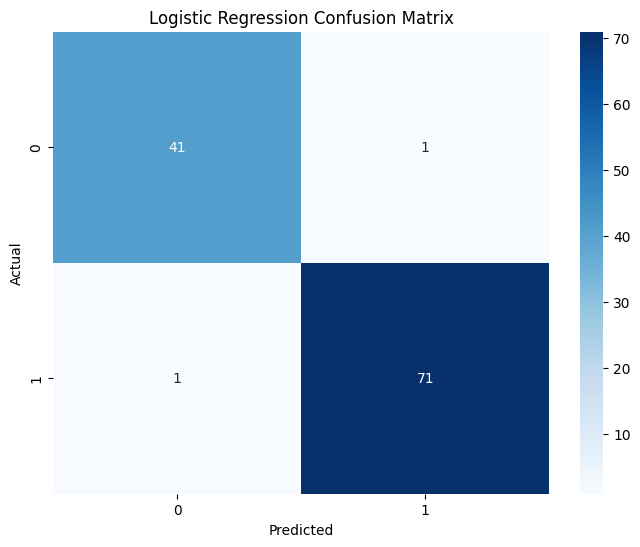

In [ ]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Bagging

Bagging (Ensemble) Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



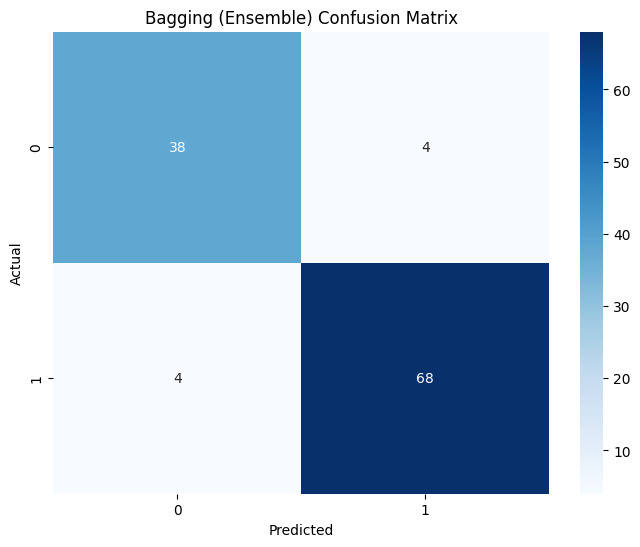

In [ ]:
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_model.predict(X_test_scaled)
print("Bagging (Ensemble) Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))
cm = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Bagging (Ensemble) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Defining models and cross validation

In [ ]:
models = {
    'DecisionTree': DecisionTreeClassifier(criterion="gini",splitter = "best", max_depth = 4, min_samples_split = 100, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'NaiveBayes': GaussianNB(),
    'SVM': SVC(kernel='linear', C=1.0, probability=True, random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}å
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    results[name] = {
        "Mean Accuracy": scores.mean(),
        "Std": scores.std()
    }

results_df = pd.DataFrame(results).T.sort_values("Mean Accuracy", ascending=False)
print(results_df)

                    Mean Accuracy       Std
LogisticRegression       0.978022  0.009829
SVM                      0.964835  0.016150
RandomForest             0.962637  0.017855
LDA                      0.960440  0.017855
Bagging                  0.949451  0.011207
NaiveBayes               0.934066  0.028656
DecisionTree             0.920879  0.008223


# Selecting 20 features based on 5 feature selection method

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, RFE, SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# For chi2, we need non-negative values
minmax_scaler = MinMaxScaler()
X_scaled_minmax = minmax_scaler.fit_transform(X)

#  Method 1: Mutual Information
mi_scores = mutual_info_classif(X_scaled, y)
mi_top_10 = X.columns[np.argsort(mi_scores)[-10:]]

#  Method 2: RFE (with Logistic Regression)
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
rfe.fit(X_scaled, y)
rfe_top_10 = X.columns[rfe.support_]

#  Method 3: ANOVA F-value (chi2)
chi_selector = SelectKBest(score_func=chi2, k=10)
chi_selector.fit(X_scaled_minmax, y)
anova_top_10 = X.columns[chi_selector.get_support()]

#  Method 4: Random Forest Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
rf_importances = rf.feature_importances_
rf_top_10 = X.columns[np.argsort(rf_importances)[-10:]]

#  Method 5: SelectFromModel (L1 Logistic Regression)
sfm = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'), threshold='median')
sfm.fit(X_scaled, y)
sfm_top = X.columns[sfm.get_support()]

# Count frequency of each feature
from collections import Counter

all_selected = list(mi_top_10) + list(rfe_top_10) + list(anova_top_10) + list(rf_top_10) + list(sfm_top)
feature_counts = Counter(all_selected)

top_features = [feature for feature, count in feature_counts.most_common(20)]

print("✅ Top 20 Final Selected Features Based on Voting Across 5 Methods:")
for i, f in enumerate(top_features, 1):
    print(f"{i}. {f}")


✅ Top 20 Final Selected Features Based on Voting Across 5 Methods:
1. worst concave points
2. mean concave points
3. worst radius
4. worst area
5. mean concavity
6. worst perimeter
7. worst concavity
8. mean area
9. mean radius
10. mean perimeter
11. area error
12. radius error
13. compactness error
14. worst texture
15. mean fractal dimension
16. texture error
17. smoothness error
18. fractal dimension error
19. worst smoothness
20. worst symmetry


# FS: mutual information

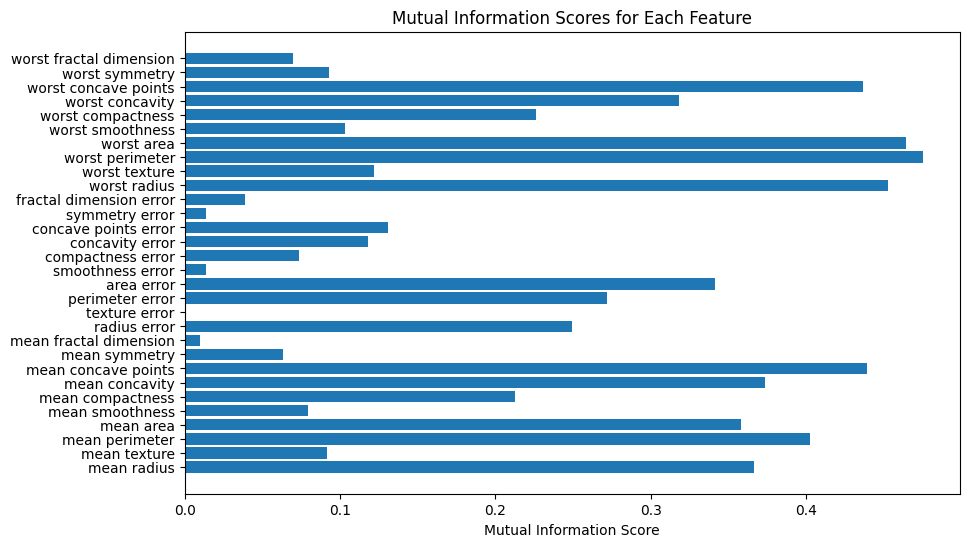

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, mi_scores)
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores for Each Feature')
plt.show()


# FS:RFE

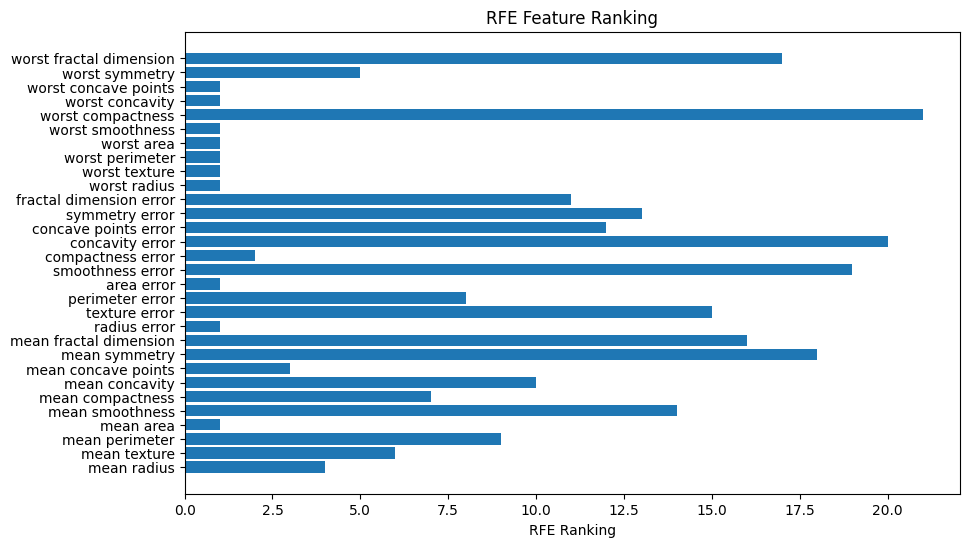

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rfe_ranking)
plt.xlabel('RFE Ranking')
plt.title('RFE Feature Ranking')
plt.show()

# FS;ANOVA F-value

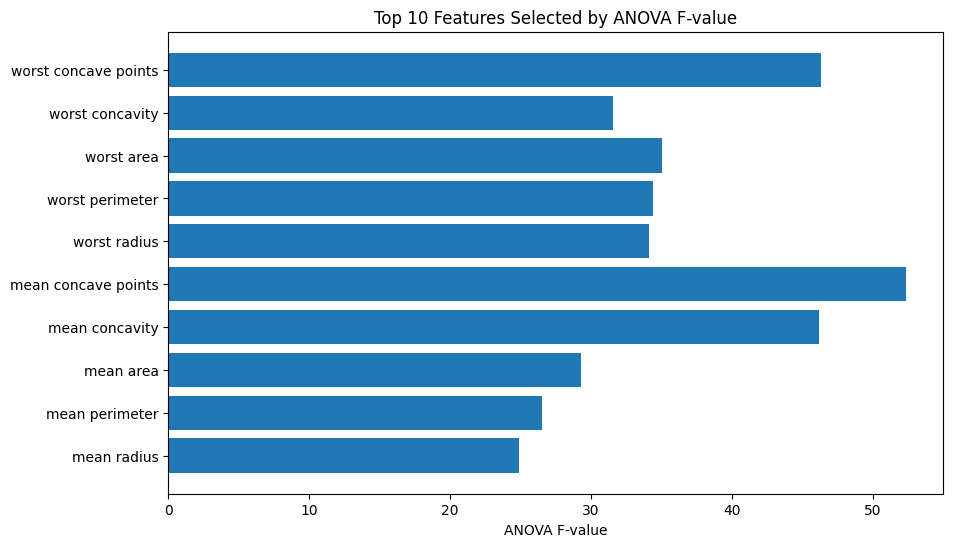

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(selected_features_f, chi_selector.scores_[chi_selector.get_support()])
plt.xlabel('ANOVA F-value')
plt.title('Top 10 Features Selected by ANOVA F-value')
plt.show()

# FS:Random Forest Feature Importance

<ipython-input-45-cea5ad941b11>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance_df, x='Importance', y='Feature', palette='viridis')


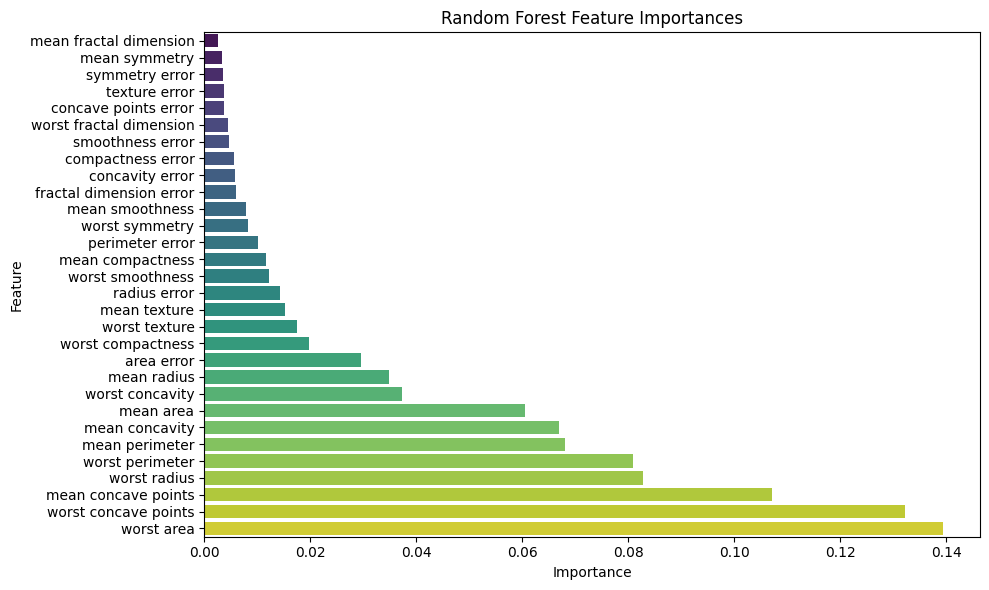

In [ ]:
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=rf_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# FS:Logistic Regression L1 (SelectFromModel)

<ipython-input-46-05045a14e9b4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=l1_df, x='Coefficient', y='Feature', palette='coolwarm')


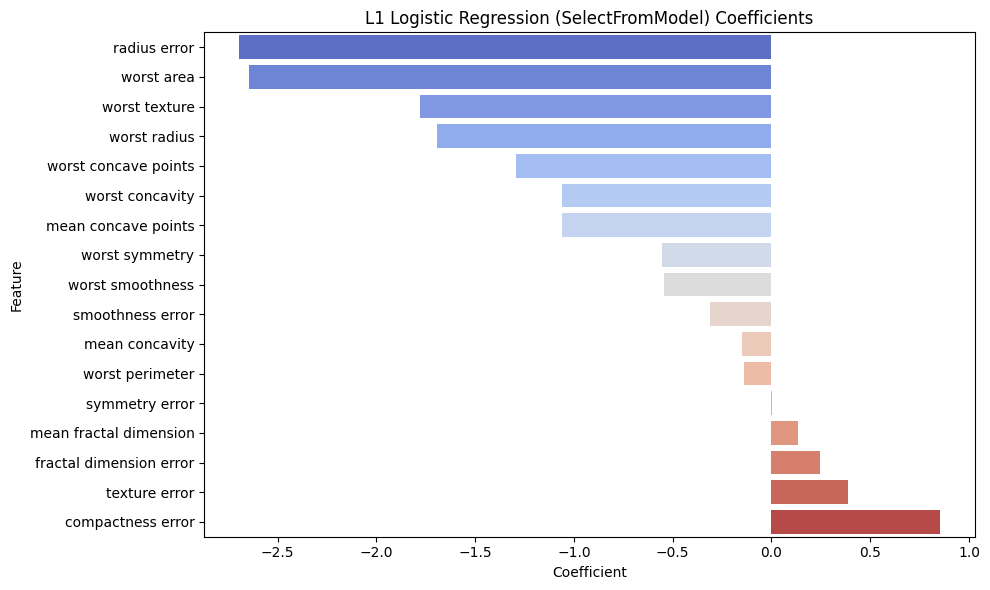

In [ ]:
# Get coefficients from model
coef = sfm.estimator_.coef_.flatten()

# Create a DataFrame for selected features
l1_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coef
})

# Only show selected features (non-zero weights)
l1_df = l1_df[l1_df['Coefficient'] != 0].sort_values(by='Coefficient')

plt.figure(figsize=(10, 6))
sns.barplot(data=l1_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('L1 Logistic Regression (SelectFromModel) Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# Train Test on data after feature selecting

In [ ]:
X_selected = X[top_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42,)
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train[top_features])
X_test_selected = scaler.transform(X_test[top_features])

# models evaluation on data after feature selecting

In [ ]:
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    print(f"\nModel: {name} (با 20 ویژگی انتخاب‌شده)")
    print(classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_pred))



Model: DecisionTree (با 20 ویژگی انتخاب‌شده)
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.92      0.96      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

AUC: 0.9091057975761546

Model: RandomForest (با 20 ویژگی انتخاب‌شده)
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

AUC: 0.9510317720275139

Model: NaiveBayes (با 20 ویژگی انتخاب‌شده)
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

# Cross validating data after feature selecting

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_selected, y_train, cv=cv, scoring='accuracy')
    results[name] = {
        "Mean Accuracy": scores.mean(),
        "Std": scores.std()
    }

results_df = pd.DataFrame(results).T.sort_values("Mean Accuracy", ascending=False)
print(results_df)

                    Mean Accuracy       Std
SVM                      0.978022  0.006950
LogisticRegression       0.978022  0.006950
LDA                      0.962637  0.014906
RandomForest             0.953846  0.025441
Bagging                  0.947253  0.032894
NaiveBayes               0.931868  0.012815
DecisionTree             0.909890  0.035027
